# Exploratory Data Analysis (EDA)

## Step 1. Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Step 2. Load Dataset

In [2]:
online_retail_df_url = 'https://raw.githubusercontent.com/nyangweso-rodgers/data-analytics/refs/heads/main/01-datasets/03-online-retail.csv'
online_retail_df = pd.read_csv(online_retail_df_url, encoding='unicode_escape')

# print shape of the data
print(f"online_retail_df shape: {online_retail_df.shape}")

online_retail_df.head()

online_retail_df shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


## Step 3. Rename Columns

In [3]:
# Define the dictionary for renaming columns
new_column_names = {
    'InvoiceDate': 'InvoiceDateTime',
}

def rename_columns(df, new_column_names):
    """
    Renames columns in the DataFrame based on the provided dictionary.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    new_column_names (dict): Dictionary with current column names as keys and new names as values.
    
    Returns:
    pd.DataFrame: A DataFrame with renamed columns.
    """

    # Rename columns based on the new_column_names dictionary
    return df.rename(columns=new_column_names)

renamed_online_retail_df = rename_columns(online_retail_df, new_column_names)
renamed_online_retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 8:26,3.39,17850.0,United Kingdom


__Explanation__
- `df.rename(columns=new_column_names)` function renames the columns as per the provided dictionary without modifying the original DataFrame (since Pandas' rename() returns a new DataFrame unless inplace=True is used).

## Step 4. Validate Data Types

In [4]:
def check_data_types(df):
    """
    Prints the data types of all columns in the DataFrame.
    """
    for col in df.columns:
        print(f"{col}: {df[col].dtype}")

# usage
check_data_types(renamed_online_retail_df)

InvoiceNo: object
StockCode: object
Description: object
Quantity: int64
InvoiceDateTime: object
UnitPrice: float64
CustomerID: float64
Country: object


__Explanation__
1. `for col in df.columns`: Iterates over the column names, ensuring clear and correct terminology.
2. `df[col].dtype`: Retrieves the data type of each column.

## Step 5. Transform (Change) Data Types

In [5]:
# Specify the column(s) and their desired data types
dtype_dict = {
    'InvoiceDateTime': 'datetime64[ns]',
    'CustomerID': str
}
def convert_data_types(df, dtype_dict):
    """
    Converts specified columns to the desired data types.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    dtype_dict (dict): A dictionary where keys are column names and values are target data types.
    
    Returns:
    pd.DataFrame: A DataFrame with updated data types.
    """
    df = df.copy()  # Create a copy of the DataFrame to avoid modifying the original
    for col, dtype in dtype_dict.items():
        try:
            if dtype in [float, int]:
                # Use pd.to_numeric for numeric conversions
                df[col] = pd.to_numeric(df[col], errors='coerce').astype(dtype)
            else:
                # Use astype directly for non-numeric types
                df[col] = df[col].astype(dtype)
            print(f"Successfully converted '{col}' to {dtype}.")
        except Exception as e:
            print(f"Error converting '{col}' to {dtype}: {e}")
    return df

df_with_correct_data_types = convert_data_types(renamed_online_retail_df, dtype_dict)
check_data_types(df_with_correct_data_types)

Successfully converted 'InvoiceDateTime' to datetime64[ns].
Successfully converted 'CustomerID' to <class 'str'>.
InvoiceNo: object
StockCode: object
Description: object
Quantity: int64
InvoiceDateTime: datetime64[ns]
UnitPrice: float64
CustomerID: object
Country: object


## Step 6. Check For `null` , or `nan` Values

In [6]:
def check_null_values(df):
    """
    Function to check for null values in each column of the DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame to check for null values.
    
    Returns:
    None
    """
    # Coerce 'nan' strings and other non-standard NaNs to np.nan
    df = df.replace('nan', np.nan)
    
    # Check for empty DataFrame to avoid division by zero
    total_rows = len(df) 
    if total_rows == 0:
        print("The DataFrame is empty.")
        return pd.DataFrame(columns=['Feature', 'Count of Null Values', 'Percentage of Null Values'])
    # Calculate null counts and percentages
    null_counts = df.isnull().sum()
    null_percentage = (null_counts / total_rows) * 100
    
    # Create a DataFrame summarizing null values
    null_df = pd.DataFrame({
        'Feature': null_counts.index,
        'Count of Null Values': null_counts.values,
        'Percentage of Null Values': null_percentage.values.round(2),
    })
    # Print shape of the DataFrame dynamically
    print(f"DataFrame shape: {df.shape}")
    
    return null_df

# Check for null values in the DataFrame and get the result as a DataFrame
null_values_df = check_null_values(df_with_correct_data_types)

# Display the resulting DataFrame
null_values_df

DataFrame shape: (541909, 8)


,Feature,Count of Null Values,Percentage of Null Values
0,InvoiceNo,0,0.00
1,StockCode,0,0.00
2,Description,1454,0.27
3,Quantity,0,0.00
4,InvoiceDateTime,0,0.00
5,UnitPrice,0,0.00
6,CustomerID,135080,24.93
7,Country,0,0.00


## Step 7. Handling `null` Values

### Step 7.1: Remove `null` and `nan` Values

In [7]:
def remove_null_rows(df, columns_to_check, verbose=True):
    """
    Function to remove rows with null values in specified columns.

    Parameters:
    df (pandas.DataFrame): The DataFrame to clean.
    columns_to_check (list): List of columns to check for null values.

    Returns:
    pandas.DataFrame: A DataFrame with rows containing null values in the specified columns removed.
    """
    # Ensure the columns to check exist in the DataFrame
    missing_cols = [col for col in columns_to_check if col not in df.columns]
    if missing_cols:
        raise ValueError(f"The following columns are not in the DataFrame: {missing_cols}")
    
    # Replace non-standard null values (e.g., 'nan' as a string) with np.nan
    df = df.replace('nan', np.nan)
    
    if verbose:
        print(f"Original DataFrame shape: {df.shape}")
        
    # Drop rows with null values in the specified columns
    cleaned_df = df.dropna(subset=columns_to_check)
    
    if verbose:
        print(f"Cleaned DataFrame shape: {cleaned_df.shape}")
    
    # Handle case where the DataFrame becomes empty
    if cleaned_df.empty:
        print("Warning: The cleaned DataFrame is empty after removing rows with null values.")

    return cleaned_df

# Specify the columns to check for null values (adjust as needed)
columns_to_check = ['CustomerID', 'Description']

# Remove rows with null values in the specified columns and save the result in a new DataFrame
df_without_nulls = remove_null_rows(df_with_correct_data_types, columns_to_check)

# Display the resulting DataFrame
df_without_nulls.head()

Original DataFrame shape: (541909, 8)
Cleaned DataFrame shape: (406829, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Step 8. Check For Negative Values

In [8]:
def display_negative_values(df, columns_to_check, return_df=False):
    """
    Function to display rows with negative values in specified columns 
    and count the number of such rows for each column.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check.
    columns_to_check (list): List of columns to check for negative values.
    return_df (bool): Whether to return the DataFrame with negative values.

    Returns:
    pandas.DataFrame (optional): A DataFrame with rows containing negative values 
    in the specified columns (if return_df=True).
    """
    # Validate column existence
    for col in columns_to_check:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")

    # Dictionary to store column-wise negative value counts
    negative_counts = {}
    
    # Identify and count rows with negative values for each column
    for col in columns_to_check:
        negative_rows = df[df[col] < 0]
        negative_counts[col] = negative_rows.shape[0]
        print(f"Column '{col}' has {negative_rows.shape[0]} rows with negative values.")
    
    # Identify rows with negative values in any of the specified columns
    negative_values_df = df[df[columns_to_check].lt(0).any(axis=1)]
    
    # Print total rows with negative values across the specified columns
    print(f"\nTotal rows with negative values in any specified column: {negative_values_df.shape[0]}")
    
    # Optionally return the DataFrame with negative values
    if return_df:
        return negative_values_df

# Example usage:
columns_to_check_negative = ['Quantity', 'UnitPrice']
negatives = display_negative_values(df_without_nulls, columns_to_check_negative, return_df=True)

Column 'Quantity' has 8905 rows with negative values.
Column 'UnitPrice' has 0 rows with negative values.

Total rows with negative values in any specified column: 8905


### Step 8.2 Remove Negative Rows

In [9]:
def remove_negative_values(df, columns_to_check):
    """
    Function to remove rows with negative values in the specified columns 
    and return a new DataFrame. It logs the number of rows removed for each column.

    Parameters:
    df (pandas.DataFrame): The original DataFrame.
    columns_to_check (list): List of columns to check for negative values.

    Returns:
    pandas.DataFrame: A new DataFrame with rows containing negative values removed.
    """
    # Validate column existence
    for col in columns_to_check:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")
    
    # Initialize total rows for logging
    initial_rows = df.shape[0]

    # Dictionary to store the number of rows deleted for each column
    rows_deleted_per_column = {}

    # Identify and log rows with negative values for each column
    for col in columns_to_check:
        negative_rows = df[df[col] < 0]
        rows_deleted_per_column[col] = negative_rows.shape[0]
        print(f"Column '{col}' had {negative_rows.shape[0]} rows with negative values.")

    # Remove rows with negative values in any of the specified columns
    cleaned_df = df[~df[columns_to_check].lt(0).any(axis=1)]

    # Calculate total rows removed
    rows_removed = initial_rows - cleaned_df.shape[0]

    # Log the summary
    print(f"\nTotal rows removed: {rows_removed}")
    print(f"New DataFrame after removing negative values has {cleaned_df.shape[0]} rows.")

    return cleaned_df

# Example usage:
columns_to_check_negative = ['Quantity', 'UnitPrice']
df_cleaned = remove_negative_values(df_without_nulls, columns_to_check_negative)


Column 'Quantity' had 8905 rows with negative values.
Column 'UnitPrice' had 0 rows with negative values.

Total rows removed: 8905
New DataFrame after removing negative values has 397924 rows.


__Exaplanation__
- It uses `df[columns_to_check].lt(0).any(axis=1)` to identify rows with negative values in any of the specified columns.
- The `~` operator negates the condition to keep only rows without negative values.

## Step : Feature Engineering

* From our data preview, we can generate the following fields:
    - `TotalAmount` = `Quantity` x `UnitPrice`
    - `Date` - extracted from the `InvoiceDate` fields
    - `DayOfWeek` from the `Date` 

In [10]:
def feature_engineering(df):
    """
    Function to perform feature engineering on the DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to process.

    Returns:
    pandas.DataFrame: The DataFrame with additional features.
    """
    # Make a copy of the DataFrame to avoid modifying the original
    df = df.copy()

    # Ensure necessary columns exist
    required_columns = ['InvoiceDateTime', 'UnitPrice', 'Quantity']
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")

    # Handle missing values in InvoiceDateTime, UnitPrice, and Quantity
    df = df.dropna(subset=required_columns)

    # Extract the date from InvoiceDateTime
    df['InvoiceDate'] = df['InvoiceDateTime'].dt.date

    # Calculate InvoiceAmount as the product of UnitPrice and Quantity
    df['InvoiceAmount'] = df['UnitPrice'] * df['Quantity']

    # Extract the day of the week (using dt accessor for better performance)
    df['InvoiceDayOfWeek'] = df['InvoiceDateTime'].dt.day_name()

    # Create InvoiceMonth column (using dt accessor for better performance)
    df['InvoiceMonth'] = df['InvoiceDateTime'].dt.to_period('M').dt.to_timestamp()

    return df

# Perform feature engineering on the cleaned DataFrame
enhanced_df = feature_engineering(df_cleaned)
enhanced_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceAmount,InvoiceDayOfWeek,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,Wednesday,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,Wednesday,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,Wednesday,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,Wednesday,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,Wednesday,2010-12-01


## Step : Descriptive Statistics

In [11]:
# descriptive statistics function
def descriptive_statistic(df):
    # Specifying datetime_is_numeric=True adopts the future behavior of Treating datetime data as categorical rather than numeric
    return df.describe(include='all')
 

descriptive_statistic(enhanced_df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDateTime,UnitPrice,CustomerID,Country,InvoiceDate,InvoiceAmount,InvoiceDayOfWeek,InvoiceMonth
count,397924,397924,397924,397924.000000,397924,397924.000000,397924,397924,397924,397924.000000,397924,397924
unique,18536,3665,3877,NaN,NaN,NaN,4339,37,305,NaN,6,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841.0,United Kingdom,2011-11-06,NaN,Thursday,NaN
freq,542,2035,2028,NaN,NaN,NaN,7847,354345,3423,NaN,80052,NaN
mean,NaN,NaN,NaN,13.021823,2011-07-10 23:43:36.912475648,3.116174,NaN,NaN,NaN,22.394749,NaN,2011-06-26 09:28:46.267327488
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.000000,NaN,NaN,NaN,0.000000,NaN,2010-12-01 00:00:00
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:12:00,1.250000,NaN,NaN,NaN,4.680000,NaN,2011-04-01 00:00:00
50%,NaN,NaN,NaN,6.000000,2011-07-31 14:39:00,1.950000,NaN,NaN,NaN,11.800000,NaN,2011-07-01 00:00:00
75%,NaN,NaN,NaN,12.000000,2011-10-20 14:33:00,3.750000,NaN,NaN,NaN,19.800000,NaN,2011-10-01 00:00:00
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,8142.750000,NaN,NaN,NaN,168469.600000,NaN,2011-12-01 00:00:00


## Step : Metrics By Country

In [12]:
def summary_statistics_by_country(df):
    """
    Function to generate summary statistics by country from the DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame with the feature-engineered data.
    
    Returns:
    pandas.DataFrame: DataFrame with summary statistics by country.
    """
    # Ensure necessary columns exist
    required_columns = ['Country', 'InvoiceMonth', 'InvoiceNo', 'CustomerID', 
                        'InvoiceAmount', 'InvoiceDate', 'Description']
    
    for col in required_columns:
        if col not in df.columns:
            raise ValueError(f"Missing required column: {col}")
        
    # Group by country and calculate required statistics
    summary_by_country = df.groupby('Country').agg(
        MonthsCount=('InvoiceMonth', 'nunique'),
        InvoicesCount=('InvoiceNo', 'nunique'),
        CustomersCount=('CustomerID', 'nunique'),
        TotalInvoiceAmount=('InvoiceAmount', 'sum'),
        InvoiceDatesCount=('InvoiceDate', 'nunique'),
        StockCodeCount=('StockCode', 'nunique'),
        ProductsDescriptionCount=('Description', 'nunique')
    ).reset_index()
    
    # Add Average Invoice Amount (avoiding division by zero)
    summary_by_country['AverageInvoiceAmount'] = (
        summary_by_country['TotalInvoiceAmount'] / summary_by_country['InvoicesCount']
    ).fillna(0)
    
    # Round numeric values to whole numbers
    summary_by_country = summary_by_country.round({
        'InvoicesCount': 0,
        'CustomersCount': 0,
        'TotalInvoiceAmount': 0,
        'InvoiceDatesCount': 0,
        'AverageInvoiceAmount': 2  # Keep two decimal places for average
    })
    
    # Sort summary by 'Number of Invoices' in descending order
    summary_by_country_sorted = summary_by_country.sort_values(by='InvoicesCount', ascending=False)

    return summary_by_country_sorted

country_summary_df = summary_statistics_by_country(enhanced_df)
country_summary_df

,Country,MonthsCount,InvoicesCount,CustomersCount,TotalInvoiceAmount,InvoiceDatesCount,StockCodeCount,ProductsDescriptionCount,AverageInvoiceAmount
35,United Kingdom,13,16649,3921,7308392.0,305,3645,3844,438.97
14,Germany,13,457,94,228867.0,201,1665,1697,500.80
13,France,13,389,87,209024.0,205,1522,1544,537.34
10,EIRE,13,260,3,265546.0,154,1943,1988,1021.33
3,Belgium,13,98,25,41196.0,83,777,784,420.37
23,Netherlands,13,95,9,285446.0,63,783,803,3004.70
30,Spain,13,90,30,61577.0,76,1091,1105,684.19
26,Portugal,13,57,19,33440.0,47,686,694,586.66
0,Australia,12,57,9,138521.0,44,599,608,2430.20
32,Switzerland,12,51,21,56444.0,47,947,954,1106.74


## Data Visualization

### Step : Day Of Week Analysis

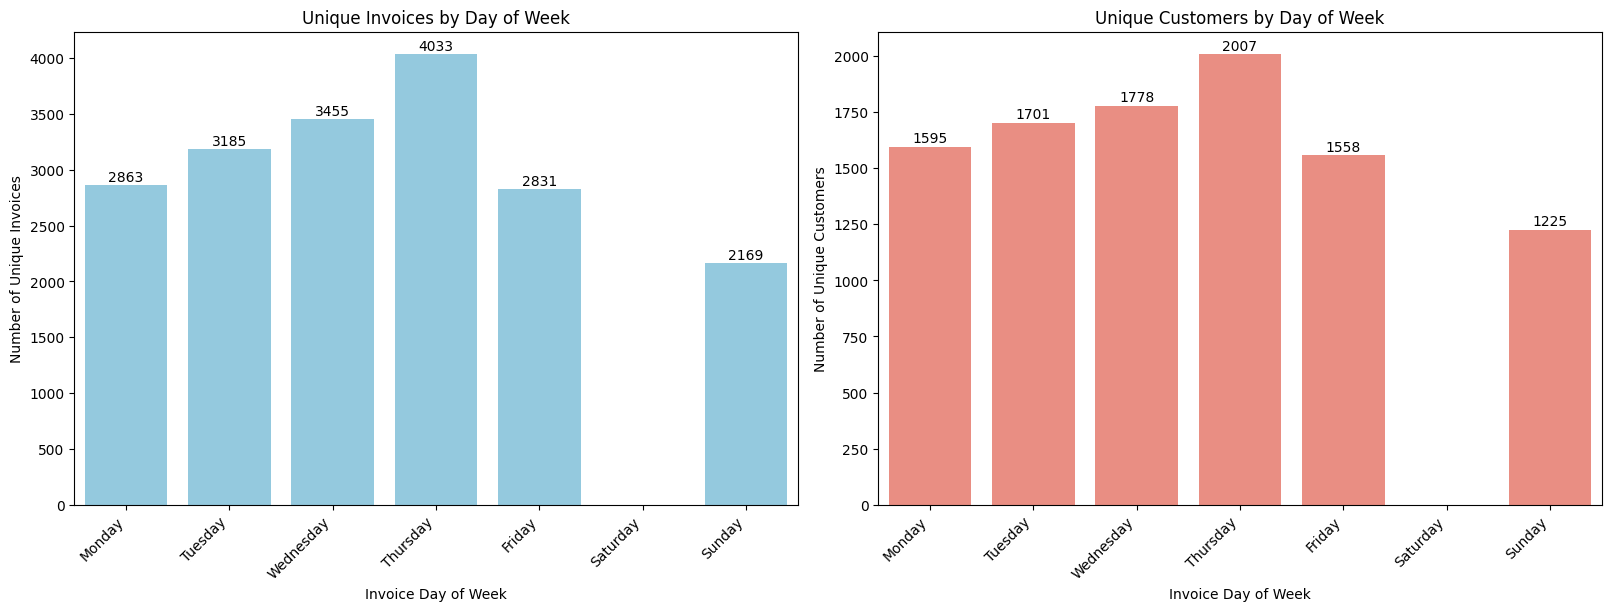

In [13]:
def visualize_data_in_subplots(df):
    """
    Function to create a 2x2 grid of subplots to visualize various metrics by DayOfWeek.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame with the feature-engineered data.
    
    Returns:
    None
    """
    # Group data and calculate metrics
    unique_invoices_by_day = df.groupby('InvoiceDayOfWeek')['InvoiceNo'].nunique().reset_index()
    unique_invoices_by_day.columns = ['InvoiceDayOfWeek', 'UniqueInvoiceCount']

    customer_count_by_day = df.groupby('InvoiceDayOfWeek')['CustomerID'].nunique().reset_index()
    customer_count_by_day.columns = ['InvoiceDayOfWeek', 'UniqueCustomerCount']

    # Sort by DayOfWeek to ensure consistent order
    days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    unique_invoices_by_day['InvoiceDayOfWeek'] = pd.Categorical(unique_invoices_by_day['InvoiceDayOfWeek'], categories=days_of_week_order, ordered=True)
    customer_count_by_day['InvoiceDayOfWeek'] = pd.Categorical(customer_count_by_day['InvoiceDayOfWeek'], categories=days_of_week_order, ordered=True)

    unique_invoices_by_day = unique_invoices_by_day.sort_values('InvoiceDayOfWeek')
    customer_count_by_day = customer_count_by_day.sort_values('InvoiceDayOfWeek')

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

     # Plot Unique Invoices by Day of Week
    sns.barplot(x='InvoiceDayOfWeek', y='UniqueInvoiceCount', data=unique_invoices_by_day, color='skyblue', ax=axes[0])
    axes[0].set_title('Unique Invoices by Day of Week')
    axes[0].set_xlabel('Invoice Day of Week')
    axes[0].set_ylabel('Number of Unique Invoices')
    for index, row in unique_invoices_by_day.iterrows():
        axes[0].text(row['InvoiceDayOfWeek'], row['UniqueInvoiceCount'] + 5,  # Adjust vertical offset (+5)
                      int(row['UniqueInvoiceCount']),
                      ha='center', va='bottom')

    # Plot Unique Customer Count by Day of Week
    sns.barplot(x='InvoiceDayOfWeek', y='UniqueCustomerCount', data=customer_count_by_day, color='salmon', ax=axes[1])
    axes[1].set_title('Unique Customers by Day of Week')
    axes[1].set_xlabel('Invoice Day of Week')
    axes[1].set_ylabel('Number of Unique Customers')
    for index, row in customer_count_by_day.iterrows():
        axes[1].text(row['InvoiceDayOfWeek'], row['UniqueCustomerCount'] + 5,  # Adjust vertical offset (+5)
                      int(row['UniqueCustomerCount']),
                      ha='center', va='bottom')

    # Rotate x-axis labels for better readability
    for ax in axes:
        ax.set_xticks(range(len(days_of_week_order)))
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.show()

# Perform visualization on the enhanced dataset
visualize_data_in_subplots(enhanced_df)

### Step : Monthly Analysis

C:\Users\rodge\AppData\Local\Temp\ipykernel_12084\204361862.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
C:\Users\rodge\AppData\Local\Temp\ipykernel_12084\204361862.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


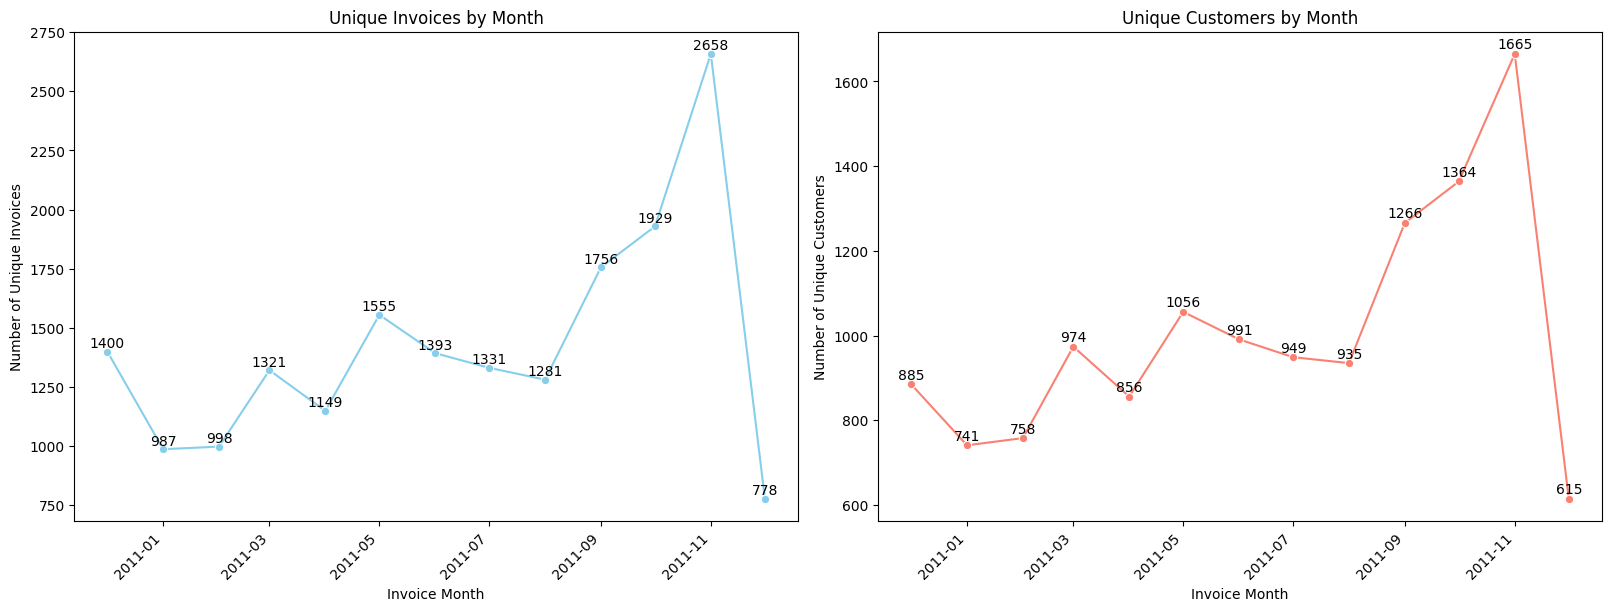

In [14]:
def visualize_data_by_month(df):
    """
    Function to create a 2x2 grid of subplots to visualize various metrics by YearMonth.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame with the feature-engineered data.
    
    Returns:
    None
    """
    # Group data and calculate metrics
    unique_invoices_by_month = df.groupby('InvoiceMonth')['InvoiceNo'].nunique().reset_index()
    unique_invoices_by_month.columns = ['InvoiceMonth', 'UniqueInvoiceCount']

    customer_count_by_month = df.groupby('InvoiceMonth')['CustomerID'].nunique().reset_index()
    customer_count_by_month.columns = ['InvoiceMonth', 'UniqueCustomerCount']

    # Ensure InvoiceMonth is treated as a categorical variable with the correct order
    unique_invoices_by_month['InvoiceMonth'] = pd.Categorical(unique_invoices_by_month['InvoiceMonth'], ordered=True, categories=sorted(unique_invoices_by_month['InvoiceMonth'].unique()))
    customer_count_by_month['InvoiceMonth'] = pd.Categorical(customer_count_by_month['InvoiceMonth'], ordered=True, categories=sorted(customer_count_by_month['InvoiceMonth'].unique()))

    unique_invoices_by_month = unique_invoices_by_month.sort_values('InvoiceMonth')
    customer_count_by_month = customer_count_by_month.sort_values('InvoiceMonth')

    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

    # Plot Unique Invoices by YearMonth
    sns.lineplot(x='InvoiceMonth', y='UniqueInvoiceCount', data=unique_invoices_by_month, marker='o', color='skyblue', ax=axes[0])
    axes[0].set_title('Unique Invoices by Month')
    axes[0].set_xlabel('Invoice Month')
    axes[0].set_ylabel('Number of Unique Invoices')
    for index, row in unique_invoices_by_month.iterrows():
        axes[0].text(row['InvoiceMonth'], row['UniqueInvoiceCount'] + 5,  # Adjust vertical offset (+5)
                      int(row['UniqueInvoiceCount']),
                      ha='center', va='bottom')

    # Plot Unique Customer Count by YearMonth
    sns.lineplot(x='InvoiceMonth', y='UniqueCustomerCount', data=customer_count_by_month, marker='o', color='salmon', ax=axes[1])
    axes[1].set_title('Unique Customers by Month')
    axes[1].set_xlabel('Invoice Month')
    axes[1].set_ylabel('Number of Unique Customers')
    for index, row in customer_count_by_month.iterrows():
        axes[1].text(row['InvoiceMonth'], row['UniqueCustomerCount'] + 5,  # Adjust vertical offset (+5)
                      int(row['UniqueCustomerCount']),
                      ha='center', va='bottom')

    # Rotate x-axis labels for better readability
    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.show()

# Perform visualization on the enhanced dataset
visualize_data_by_month(enhanced_df)

## Packed Bubble Charts 
- Packed bubble charts are used to display data in a cluster of circles. Each entry is displayed as an individual circle and two main variables can be used: size of the bubbles and colour.

# Resources and Further Reading
1. 